<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>
<h1>Nano Desafio 6 </h1>

Aluno: Daniel Arnóbio Dantas da Silva

##### Introdução

##### O conjunto de dados
A Walt Disney Studios já produziu mais de 600 filmes desde seu filme de estreia, Branca de Neve e os Sete Anões, em 1937. Vamos, explorar um conjunto de dados de filmes da Disney !! Esses dados foram compilados por <a href="https://data.world/kgarrett/disney-character-success-00-16">Kelly Garrett</a>. Os dados contêm 579 filmes da Disney com seis características: título do filme, data de lançamento, gênero, classificação MPAA, bilheteria bruta  e bilheteria ajustada pela inflação. </p>

Importando o dataframe

In [70]:
import pandas as pd
import numpy as np
# Leia o arquivo 
dados = pd.read_csv('disney_movies_total_gross.csv', parse_dates =['release_date'])

In [71]:
dados.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


Renomeando as colunas para o português

['tit_do_filme','dt_lancamento','genero','classificacao_mpaa','bilheteria_bruta','bilheteria_ajustada_inflacao']

In [72]:
dados.columns = ['tit_do_filme','dt_lancamento','genero','classificacao_mpaa','bilheteria_bruta','bilheteria_ajustada_inflacao']

In [73]:
dados.head()

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [74]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tit_do_filme                  579 non-null    object        
 1   dt_lancamento                 579 non-null    datetime64[ns]
 2   genero                        562 non-null    object        
 3   classificacao_mpaa            523 non-null    object        
 4   bilheteria_bruta              579 non-null    int64         
 5   bilheteria_ajustada_inflacao  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


Média da bilheteria ajustada a inflação

In [75]:
dados['bilheteria_ajustada_inflacao'].mean()

118762523.31088082

Mediana da bilheterias ajustada

In [76]:
dados['bilheteria_ajustada_inflacao'].median()

55159783.0

Datas máximas e minimas de lançamentos de filmes nesse dataset

In [77]:
dados['dt_lancamento'].max()

Timestamp('2016-12-16 00:00:00')

In [78]:
dados['dt_lancamento'].min()

Timestamp('1937-12-21 00:00:00')

8 - Qual filme tem maior bilheteria_ajustada_inflacao ?

In [79]:
dados.sort_values(by='bilheteria_ajustada_inflacao', ascending=False).head(1)

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


Ordenando os dados por dt_lancamento e criando um novo dataframe chamado de de data_ordenada

In [80]:
data_ordenada = dados.sort_values(by='dt_lancamento')

In [81]:
data_ordenada

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


Obtenando a soma cumulativa da bilheteria_ajustada_inflacao, e adicionando ao dataset com o nome de bilheteria_milionaria

In [82]:
dados['bilheteria_milionaria'] = dados['bilheteria_ajustada_inflacao'].cumsum()

In [83]:
dados['bilheteria_milionaria']

0       5228953251
1       7417182303
2       9604273111
3      10682783690
4      11603392420
          ...     
574    67746527720
575    67755402109
576    67987935032
577    68234017061
578    68763500997
Name: bilheteria_milionaria, Length: 579, dtype: int64

Selecionando os filmes de aventura e atribuindo a uma variável chamada filmes_aventura

In [84]:
filmes_aventura = dados.loc[dados['genero']== 'Adventure']

In [85]:
filmes_aventura.head()

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao,bilheteria_milionaria
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,7417182303
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,10682783690
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994,12131672414
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353,153870834,15450472960
21,The Rescuers,1977-06-22,Adventure,NaN,48775599,159743914,17215424200


Contando o número de filmes por genero e ordenando

In [86]:
dados['genero'].value_counts(ascending=False)

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genero, dtype: int64

Calculando a proporção de filmes por genero e ordenando

In [87]:
dados['genero'].value_counts(normalize=True)*100

Comedy                 32.384342
Adventure              22.953737
Drama                  20.284698
Action                  7.117438
Thriller/Suspense       4.270463
Romantic Comedy         4.092527
Musical                 2.846975
Documentary             2.846975
Western                 1.245552
Horror                  1.067616
Black Comedy            0.533808
Concert/Performance     0.355872
Name: genero, dtype: float64

Estatísticas resumidas agrupadas

Total da "bilheteria_bruta"

In [88]:
dados['bilheteria_bruta'].sum()

37462335553

Calculando o total da bilheteria_bruta pelo genero 'Drama'

In [89]:
dados.loc[dados['genero']=="Drama"]['bilheteria_bruta'].sum()

4106972970

Total da bilheteria_bruta pelo genero Comedia 'Comedy'

In [90]:
dados.loc[dados['genero']=="Comedy"]['bilheteria_bruta'].sum()

8119619678

In [91]:
dados.loc[dados['genero'] == 'Comedy']['bilheteria_bruta'].sum()

8119619678

Total da bilheteria_bruta pelo genero Ação 'Action'

In [92]:
dados.loc[dados['genero'] == 'Action']['bilheteria_bruta'].sum()

4184563282

Obtendo a proporção da bilheteria_bruta para os três generos acima.

In [93]:
tres_generos = dados.loc[(dados['genero'] == 'Action') | (dados['genero'] == 'Comedy') | (dados['genero'] == 'Drama')]

In [94]:
tres_generos['genero'].unique()

array(['Drama', 'Comedy', 'Action'], dtype=object)

In [95]:
tres_generos['genero'].value_counts(normalize=True)*100

Comedy    54.166667
Drama     33.928571
Action    11.904762
Name: genero, dtype: float64

23 - Para cada genero de filme, agregue a bilheteria_bruta obtendo min, max, média e mediana e imprima o resultado

Dica: use numpy para as estatísticas

In [96]:
#tentando por groupby
dados.groupby(['genero'])['bilheteria_bruta'].max()


genero
Action                 623279547
Adventure              936662225
Black Comedy            52353636
Comedy                 244082982
Concert/Performance     65281781
Documentary             32011576
Drama                  201151353
Horror                  26570463
Musical                218951625
Romantic Comedy        178406268
Thriller/Suspense      293506292
Western                 89302115
Name: bilheteria_bruta, dtype: int64

In [97]:
#confirmando o valor máximo
dados['bilheteria_bruta'].max()


936662225

In [98]:
#usando a função agg
resumo1 = dados.groupby('genero').agg({'bilheteria_bruta':['min', 'max', 'mean', 'median']})
resumo1

bilheteria_bruta                                     
                                 min        max          mean      median
genero                                                                   
Action                             0  623279547  1.046141e+08  43315244.5
Adventure                       2815  936662225  1.270471e+08  65000000.0
Black Comedy                17105219   52353636  3.251440e+07  28084357.0
Comedy                         45779  244082982  4.461329e+07  26923500.5
Concert/Performance         38174685   65281781  5.172823e+07  51728233.0
Documentary                    20521   32011576  1.129285e+07   9688331.0
Drama                              0  201151353  3.602608e+07  19730097.0
Horror                       4877567   26570463  1.451148e+07  13439137.5
Musical                      5632086  218951625  7.233026e+07  53041787.5
Romantic Comedy               468240  178406268  5.009595e+07  32680633.0
Thriller/Suspense            2154540  293506292  5.861694e+07  28153827.0
Western                      8247627   89302115  5.128735e+07  56932305.0

24 - Para cada genero de filme, agregue bilheteria_bruta e bilheteria_ajustada_inflacao: obtenha o minimo, maximo, média e mediana

In [99]:
resumo1 = dados.groupby('genero').agg({'bilheteria_bruta':['min', 'max', 'mean', 'median'], 'bilheteria_ajustada_inflacao':['min', 'max', 'mean', 'median']})
resumo1

bilheteria_bruta                                       \
                                 min        max          mean      median   
genero                                                                      
Action                             0  623279547  1.046141e+08  43315244.5   
Adventure                       2815  936662225  1.270471e+08  65000000.0   
Black Comedy                17105219   52353636  3.251440e+07  28084357.0   
Comedy                         45779  244082982  4.461329e+07  26923500.5   
Concert/Performance         38174685   65281781  5.172823e+07  51728233.0   
Documentary                    20521   32011576  1.129285e+07   9688331.0   
Drama                              0  201151353  3.602608e+07  19730097.0   
Horror                       4877567   26570463  1.451148e+07  13439137.5   
Musical                      5632086  218951625  7.233026e+07  53041787.5   
Romantic Comedy               468240  178406268  5.009595e+07  32680633.0   
Thriller/Suspense            2154540  293506292  5.861694e+07  28153827.0   
Western                      8247627   89302115  5.128735e+07  56932305.0   

                    bilheteria_ajustada_inflacao                            \
                                             min         max          mean   
genero                                                                       
Action                                         0   660081224  1.374734e+08   
Adventure                                   2984  2188229052  1.903974e+08   
Black Comedy                            28392518    76758193  5.224349e+07   
Comedy                                     82277  1362870985  8.466773e+07   
Concert/Performance                     38174685    76646993  5.741084e+07   
Documentary                                23064    35981010  1.271803e+07   
Drama                                          0  1236035515  7.189302e+07   
Horror                                   9907922    48546161  2.341385e+07   
Musical                                 11468231  5228953251  6.035979e+08   
Romantic Comedy                           907414   356389765  7.777708e+07   
Thriller/Suspense                        3957025   485424724  8.965379e+07   
Western                                 15983331   115781734  7.381571e+07   

                                  
                          median  
genero                            
Action                69012064.5  
Adventure            102254492.0  
Black Comedy          51579764.0  
Comedy                51195217.0  
Concert/Performance   57410839.0  
Documentary           12344483.5  
Drama                 39325794.0  
Horror                18589709.5  
Musical              103167587.5  
Romantic Comedy       57925202.0  
Thriller/Suspense     51804588.0  
Western               89042541.0

Está na hora de fazermos um pouco de gráficos. Não existe análise de dados sem visualização!!

In [100]:
import seaborn as sns


25 - Some a bilheteria_bruta por genero

In [101]:
dados.groupby(['genero'])['bilheteria_bruta'].sum()


genero
Action                  4184563282
Adventure              16389069453
Black Comedy              97543212
Comedy                  8119619678
Concert/Performance      103456466
Documentary              180685619
Drama                   4106972970
Horror                    87068872
Musical                 1157284155
Romantic Comedy         1152206855
Thriller/Suspense       1406806519
Western                  359011459
Name: bilheteria_bruta, dtype: int64

<AxesSubplot:xlabel='genero'>

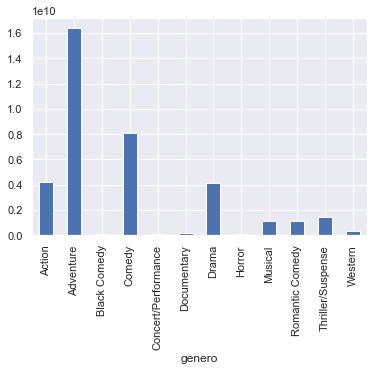

In [102]:
dados.groupby(['genero'])['bilheteria_bruta'].sum().plot.bar()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a40c75ba-e429-46fb-872c-426d1864cfe2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>